Use this first cell to import the necessary libraries.

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.feature_selection import chi2 as sklearn_chi2
from sklearn.preprocessing import LabelEncoder

# 1. **Data Management**


In this part:

1.   analyse and prepare the data. Use plots, graphs, and tables (such as histogram, box plots, scatterplots etc.) to better analyse the dataset and identify issues or potential improvements in the data, including (but not limited to) unnecessary feature/variable which can be dropped/removed, standardization, encoding, etc;
2.   split the data and define your experimental protocol (such as cross-validation or k-fold).

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20

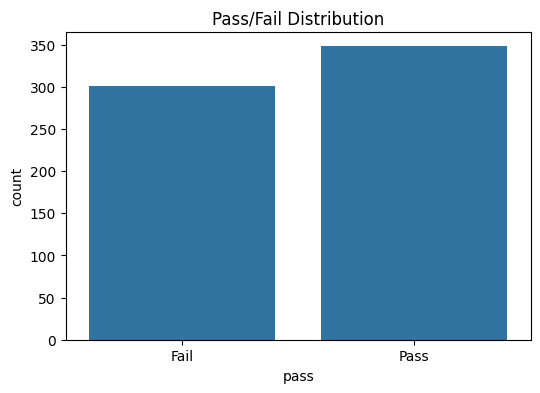

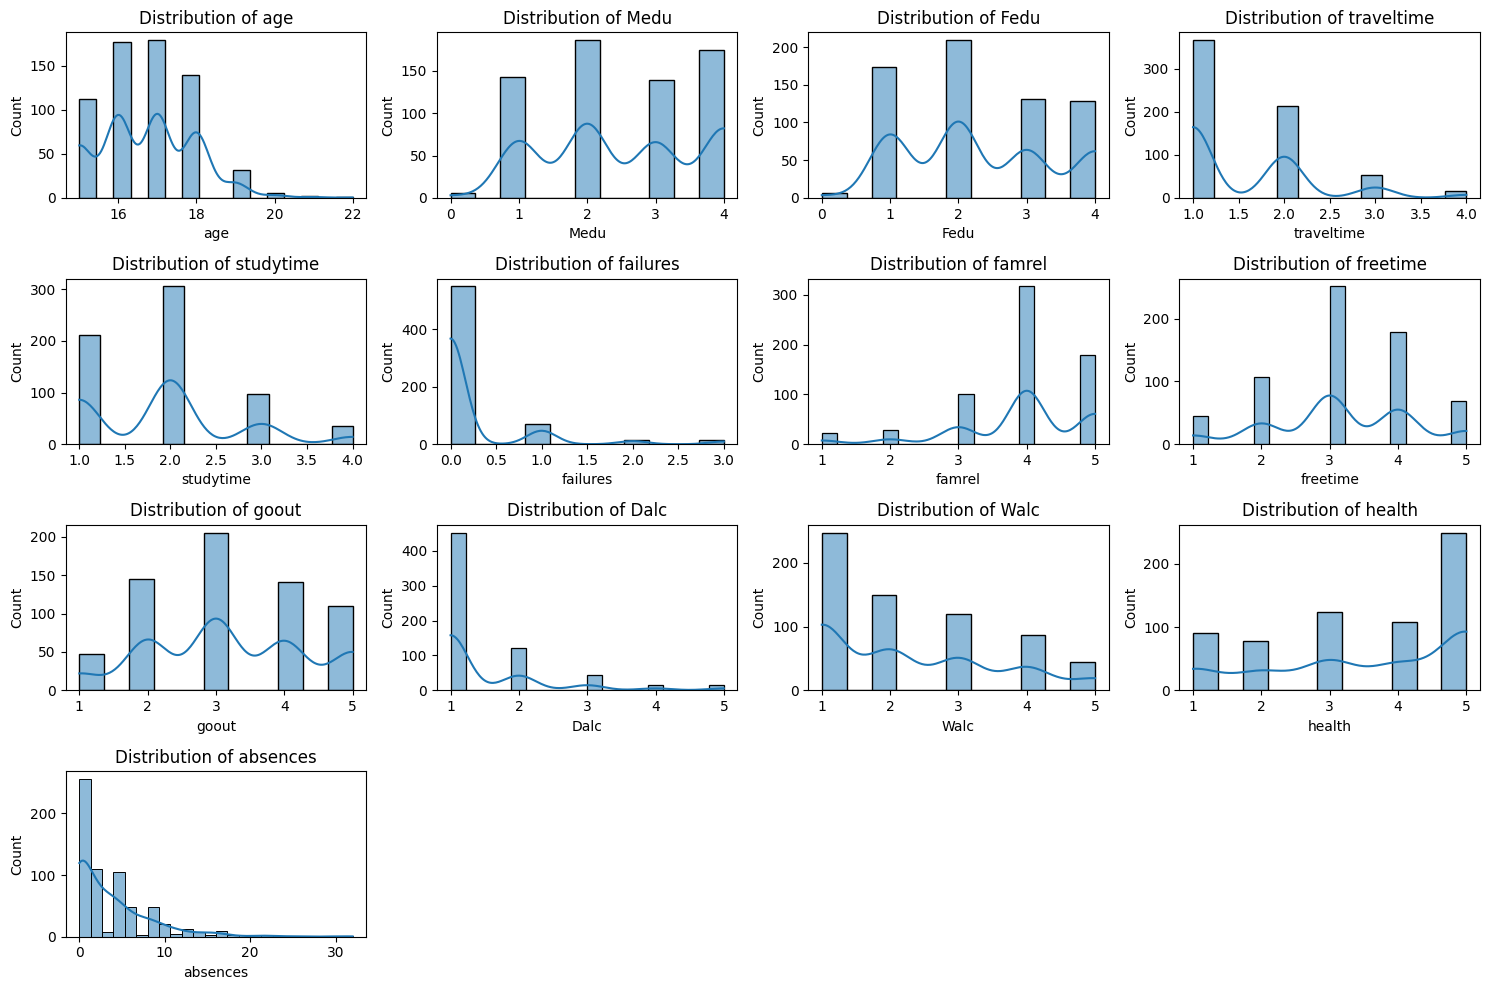

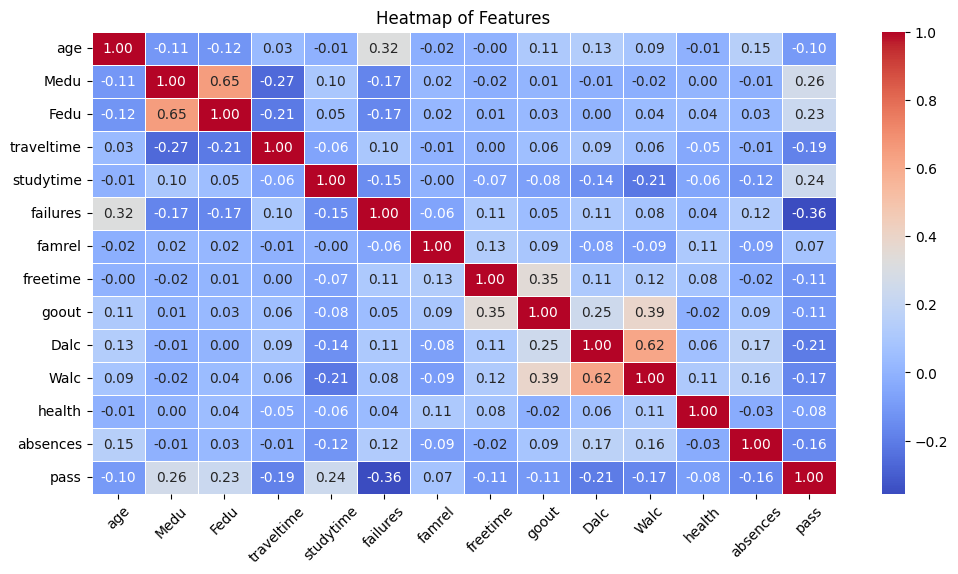

pass          1.000000
Medu          0.261387
studytime     0.239055
Fedu          0.231348
famrel        0.074834
health       -0.084668
age          -0.098971
goout        -0.106104
freetime     -0.113957
absences     -0.160911
Walc         -0.169947
traveltime   -0.185289
Dalc         -0.206641
failures     -0.355557
Name: pass, dtype: float64


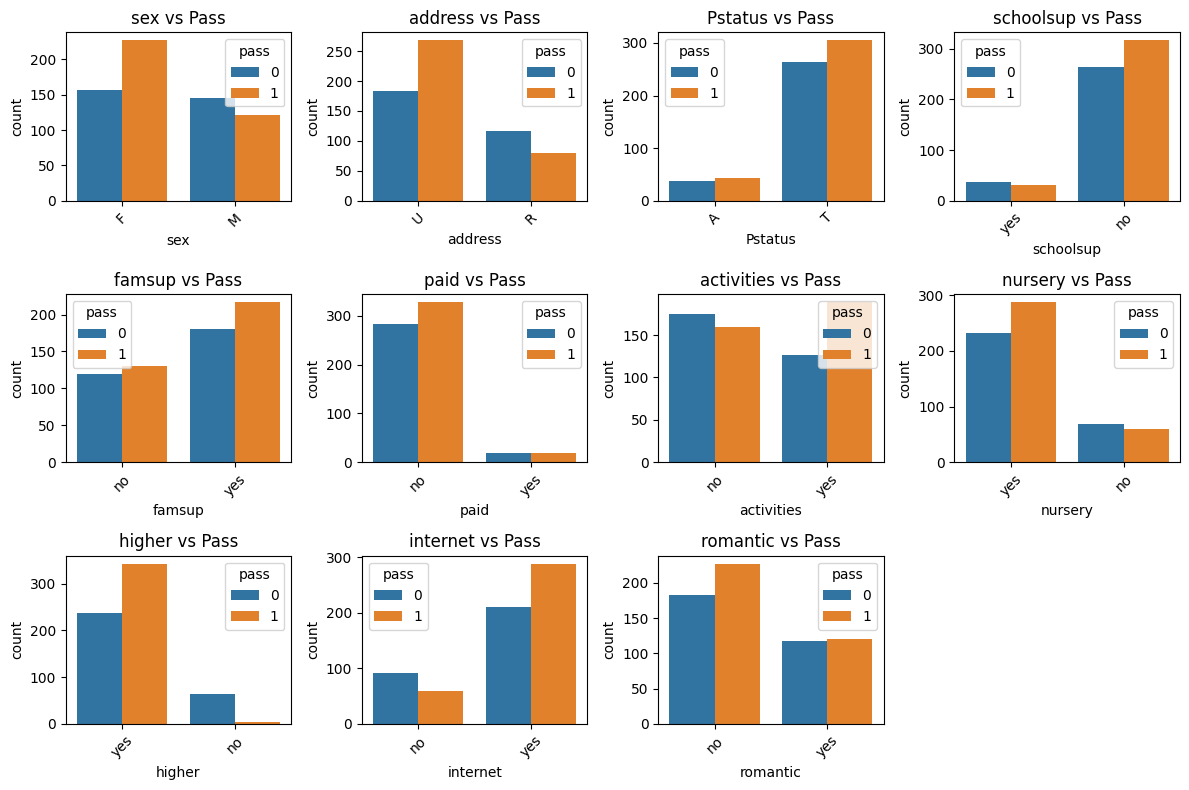

Chi-square Test Results using sklearn.feature_selection.chi2:
       Feature  Chi2 Statistic   p-value  Significance
8       higher        7.098618  0.007714          True
0          sex        7.073673  0.007822          True
1      address        5.845392  0.015618          True
6   activities        5.154250  0.023190          True
9     internet        3.549879  0.059550         False
3    schoolsup        1.764322  0.184086         False
10    romantic        0.861100  0.353431         False
7      nursery        0.575457  0.448099         False
4       famsup        0.130110  0.718318         False
5         paid        0.085789  0.769600         False
2      Pstatus        0.000075  0.993076         False


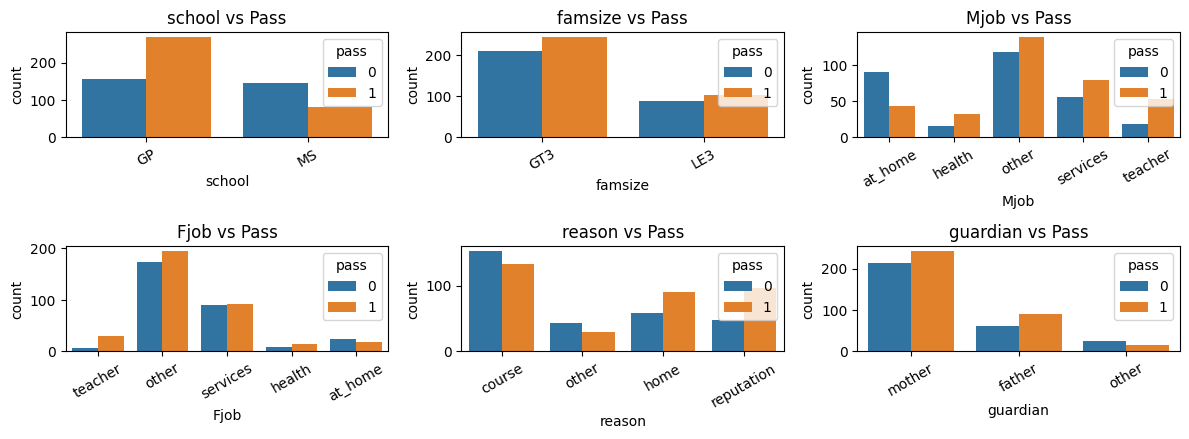

Chi-square Test Results using sklearn.feature_selection.chi2:
    Feature  Chi2 Statistic       p-value  Significance
0    school       30.177186  3.943207e-08          True
2      Mjob       23.809974  1.063301e-06          True
4    reason       13.293972  2.662608e-04          True
5  guardian        1.903675  1.676675e-01         False
3      Fjob        1.194757  2.743722e-01         False
1   famsize        0.000048  9.944846e-01         False
   school  sex  address  Mjob  reason  traveltime  studytime  failures  \
0       0    0        1     0       0    0.576718   0.083653 -0.374305   
1       0    0        1     0       0   -0.760032   0.083653 -0.374305   
2       0    0        1     0       2   -0.760032   0.083653 -0.374305   
3       0    0        1     1       1   -0.760032   1.290114 -0.374305   
4       0    0        1     2       1   -0.760032   0.083653 -0.374305   

   activities  higher  internet  absences  pass      Pedu      Aalc  
0           0       1         0

In [2]:
# Write your proposed solution code here. Create more code cells if you find it necessary

# Load the dataset to a DataFrame;
df = pd.read_csv('/content/assign1-grades.csv')

# Check whether the type of each column in the data set is reasonable
print("Data Types:")
print(df.info())

# View data distribution,check outliers and standard deviation
print("Data Distribution:")
print(df.describe())

# Count the number of missing values ​​in each column
print("Missing Values:")
print(df.isnull().sum())

# Convert grades into binary variables
df['pass'] = (df['Grade'] >= 12).astype(int)
df.drop(columns = ['Grade'], inplace= True)

plt.figure(figsize=(6, 4))
sns.countplot(x=df['pass'])
plt.title("Pass/Fail Distribution")
plt.xticks([0, 1], ["Fail", "Pass"])
plt.show()

# Generate histogram of features
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
plt.figure(figsize=(15,10))
for i, feature in enumerate(numerical_features, 1):
  plt.subplot(4, 4, i)
  sns.histplot(df[feature], kde=True)
  plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

# Generate heatmap
plt.figure(figsize=(12,6))
numerical_df = df.select_dtypes(include=np.number) # Remove character data from the data
sns.heatmap(numerical_df.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.xticks(rotation=45)
plt.title('Heatmap of Features')
plt.show()
corrgrade = numerical_df.corr()['pass'].sort_values(ascending=False)
print(corrgrade)

# Combined parents' education level
df['Pedu'] = df['Medu'] + df['Fedu']
df.drop(columns=['Medu', 'Fedu'], inplace=True)
# Combined alcohol situation
df['Aalc'] = (df['Dalc'] + df['Walc']) / 2
df.drop(columns=['Dalc', 'Walc'], inplace=True)

# drop numerical columns
drop_numerical_columns = ['freetime', 'age', 'health', 'famrel', 'goout']
df = df.drop(columns=drop_numerical_columns)

# Binary variables
binary = ['sex', 'address', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Bar chart
plt.figure(figsize=(12, 8))
for i, var in enumerate(binary, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=df, x=var, hue='pass')
    plt.title(f'{var} vs Pass')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chi-square Test
for i in binary:
  df[i] = LabelEncoder().fit_transform(df[i])
X = df[binary]
y = df['pass']
chi2_states, p_values = sklearn_chi2(X, y)
chi2_results = pd.DataFrame({'Feature': X.columns,'Chi2 Statistic': chi2_states, 'p-value': p_values})
chi2_results['Significance'] = chi2_results['p-value']< 0.05
print("Chi-square Test Results using sklearn.feature_selection.chi2:")
print(chi2_results.sort_values(by='Chi2 Statistic', ascending=False))

# Remove column from Binary variables
drop_binary_columns = ['Pstatus', 'schoolsup', 'famsup', 'paid', 'nursery', 'romantic']
df = df.drop(columns=drop_binary_columns)

# String variables
categorical_features = ['school', 'famsize', 'Mjob', 'Fjob', 'reason', 'guardian']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=df[feature], hue=df['pass'])
    plt.title(f"{feature} vs Pass")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# encoder string data
for i in categorical_features:
    df[i] = LabelEncoder().fit_transform(df[i])
X = pd.get_dummies(df[categorical_features], drop_first=True)
y = df['pass']

# Chi-square test
chi2_states, p_values = sklearn_chi2(X, y)
chi2_results = pd.DataFrame({'Feature': X.columns,'Chi2 Statistic': chi2_states, 'p-value': p_values})
chi2_results['Significance'] = chi2_results['p-value']< 0.05
print("Chi-square Test Results using sklearn.feature_selection.chi2:")
print(chi2_results.sort_values(by='Chi2 Statistic', ascending=False))

# drop categorical colomns
drop_categorical_columns = ['famsize', 'Fjob', 'guardian']
df = df.drop(columns=drop_categorical_columns)

# Normolization
scaler = StandardScaler()
stand_cols = ['Pedu', 'traveltime', 'studytime', 'failures', 'Aalc','absences']
df[stand_cols] = scaler.fit_transform(df[stand_cols])
print(df.head())

# Splitting the data
X = df.drop(columns=['pass'],axis=1)
y = df['pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Defining the experimental protocol
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Final examination
print("Features：", X.columns.tolist())
print("Training set：", X_train.shape)
print("Test set：", X_test.shape)
print("Ratio：", y.mean())


---

# 2. **Model Training**


1.	select and compare at least three machine learning models (seen/discussed during the lectures) appropriate for your modelling;
2.	if there are hyperparameters in a selected algorithm, define a hyperparameter search protocol (you can define your own), and tune them.


In [3]:
# import libraries here
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import time

In [4]:
# Write your proposed solution code here. Create more code cells if you find it necessary

# Defining a classification model
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)

# Display the operation results
def print_grid_search_results(grid_search, model_name):
    print(f"{model_name} - Detailed Results:")
    print("Parameter Combinations and Scores:")
    for params, mean_score, std_score, fit_time in zip(
        grid_search.cv_results_['params'],
        grid_search.cv_results_['mean_test_score'],
        grid_search.cv_results_['std_test_score'],
        grid_search.cv_results_['mean_fit_time']
    ):
        print(f"Params: {params}, Mean Accuracy: {mean_score:.4f}, Std: {std_score:.4f}, Fit Time: {fit_time:.4f}s")
    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Best CV Accuracy: {grid_search.best_score_:.4f}")
    print(f"{model_name} - Total Training Time: {grid_search.refit_time_:.4f}s")

# Hyperparameter tuning:lr
param_lr = {'C': [0.01, 0.1, 1, 10, 100]}
start_time = time.time()
grid_lr = GridSearchCV(lr, param_lr, cv=kf, scoring='accuracy',n_jobs=-1)
grid_lr.fit(X_train, y_train)
lr_training_time = time.time() - start_time
print_grid_search_results(grid_lr, "Logistic Regression")
print(f"Logistic Regression - Total Execution Time: {lr_training_time:.4f}s")
print("Logistic regression optimal parameters:", grid_lr.best_params_)
print("Logistic regression optimal accuracy:", grid_lr.best_score_)

# Hyperparameter tuning:dt
param_dt = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
start_time = time.time()
grid_dt = GridSearchCV(dt, param_dt, cv=kf, scoring='accuracy',n_jobs=-1)
grid_dt.fit(X_train, y_train)
dt_training_time = time.time() - start_time
print_grid_search_results(grid_dt, "Decision Tree")
print(f"Decision Tree - Total Execution Time: {dt_training_time:.4f}s")
print("Decision tree optimal parameters:", grid_dt.best_params_)
print("Decision tree optimal accuracy:", grid_dt.best_score_)

# Hyperparameter tuning:rf
param_rf = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7, 10], 'max_features': ['sqrt','log2']}
start_time = time.time()
grid_rf = GridSearchCV(rf, param_rf, cv=kf, scoring='accuracy',n_jobs=-1)
grid_rf.fit(X_train, y_train)
rf_training_time = time.time() - start_time
print_grid_search_results(grid_rf, "Random Forest")
print(f"Random Forest - Total Execution Time: {rf_training_time:.4f}s")
print("Random forest optimal parameters:", grid_rf.best_params_)
print("Random forest optimal accuracy:", grid_rf.best_score_)

# SVM
param_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient (for rbf)
}
start_time = time.time()
grid_svm = GridSearchCV(svm, param_svm, cv=kf, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)
svm_training_time = time.time() - start_time
print_grid_search_results(grid_svm, "SVM")
print(f"SVM - Total Execution Time: {svm_training_time:.4f}s")
print("SVM - Best Parameters:", grid_svm.best_params_)
print("SVM - Best Accuracy:", grid_svm.best_score_)


Logistic Regression - Detailed Results:
Parameter Combinations and Scores:
Params: {'C': 0.01}, Mean Accuracy: 0.7476, Std: 0.0252, Fit Time: 0.0218s
Params: {'C': 0.1}, Mean Accuracy: 0.7611, Std: 0.0307, Fit Time: 0.0286s
Params: {'C': 1}, Mean Accuracy: 0.7553, Std: 0.0220, Fit Time: 0.0253s
Params: {'C': 10}, Mean Accuracy: 0.7572, Std: 0.0168, Fit Time: 0.0360s
Params: {'C': 100}, Mean Accuracy: 0.7572, Std: 0.0168, Fit Time: 0.0228s
Logistic Regression - Best Parameters: {'C': 0.1}
Logistic Regression - Best CV Accuracy: 0.7611
Logistic Regression - Total Training Time: 0.0260s
Logistic Regression - Total Execution Time: 4.3239s
Logistic regression optimal parameters: {'C': 0.1}
Logistic regression optimal accuracy: 0.7610716952949963
Decision Tree - Detailed Results:
Parameter Combinations and Scores:
Params: {'max_depth': 3, 'min_samples_split': 2}, Mean Accuracy: 0.7014, Std: 0.0309, Fit Time: 0.0168s
Params: {'max_depth': 3, 'min_samples_split': 5}, Mean Accuracy: 0.7014, Std

---

# 3. **Evaluate models**


1.	test the model (the best one you obtained from the above stage) on the testing dataset.


In [5]:
# import libraries here
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Logistic Regression - Test Set Results:
Logistic regression accuracy: 0.7692307692307693
Logistic regression precision: 0.7439024390243902
Logistic regression recall: 0.8714285714285714
Logistic regression f1 score: 0.8026315789473685


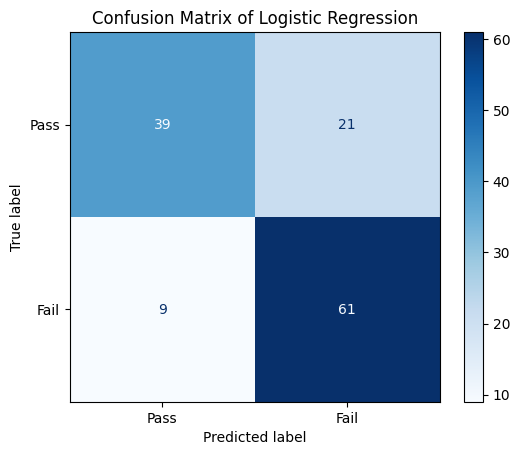

Random forest - Test Set Results:
Random forest accuracy: 0.7538461538461538
Random forest precision: 0.7317073170731707
Random forest recall: 0.8571428571428571
Random forest f1 score: 0.7894736842105263


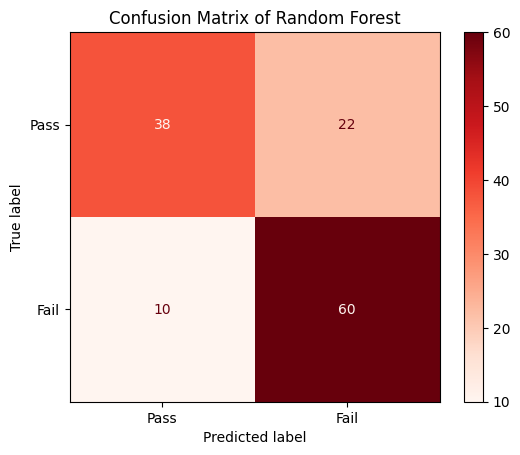

Decision tree - Test Set Results:
Decision tree accuracy: 0.7538461538461538
Decision tree precision: 0.7261904761904762
Decision tree recall: 0.8714285714285714
Decision tree f1 score: 0.7922077922077922


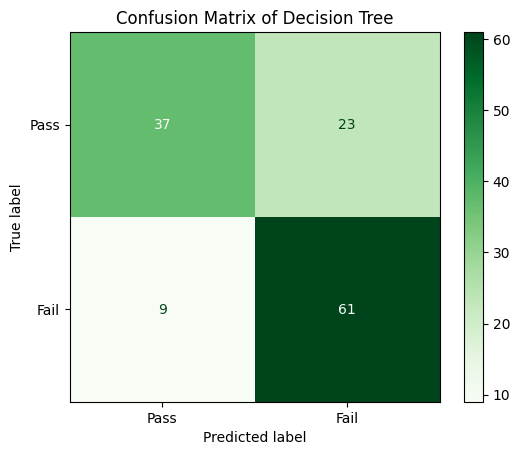

SVM - Test Set Results:
SVM accuracy: 0.7692307692307693
SVM precision: 0.7439024390243902
SVM recall: 0.8714285714285714
SVM f1 score: 0.8026315789473685


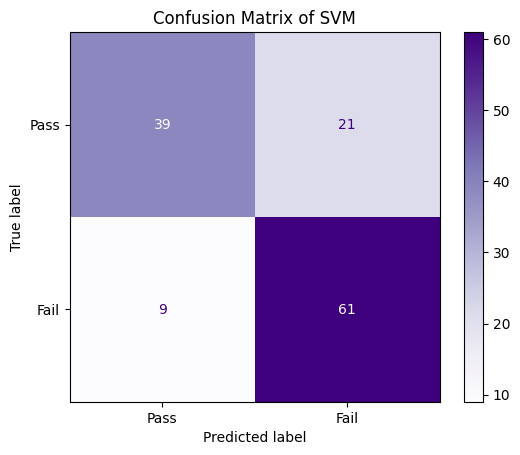

In [6]:
# Write your proposed solution code here. Create more code cells if you find it necessary

# Logistic regression:Calculation indicators
lr_accuracy = accuracy_score(y_test, grid_lr.predict(X_test))
lr_precision = precision_score(y_test, grid_lr.predict(X_test))
lr_recall = recall_score(y_test, grid_lr.predict(X_test))
lr_fscore = f1_score(y_test, grid_lr.predict(X_test))
print("Logistic Regression - Test Set Results:")
print("Logistic regression accuracy:", lr_accuracy)
print("Logistic regression precision:", lr_precision)
print("Logistic regression recall:", lr_recall)
print("Logistic regression f1 score:", lr_fscore)

# Confusion Matrix of Logistic regression
lr_cm = confusion_matrix(y_test, grid_lr.predict(X_test))
lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=['Pass','Fail'])
lr_disp.plot(cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

# Random forest:Calculation indicators
rf_accuracy = accuracy_score(y_test, grid_rf.predict(X_test))
rf_precision = precision_score(y_test, grid_rf.predict(X_test))
rf_recall = recall_score(y_test, grid_rf.predict(X_test))
rf_fscore = f1_score(y_test, grid_rf.predict(X_test))
print("Random forest - Test Set Results:")
print("Random forest accuracy:", rf_accuracy)
print("Random forest precision:", rf_precision)
print("Random forest recall:", rf_recall)
print("Random forest f1 score:", rf_fscore)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, grid_rf.predict(X_test))
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['Pass','Fail'])
rf_disp.plot(cmap='Reds')
plt.title('Confusion Matrix of Random Forest')
plt.show()

# Decision tree:Calculation indicators
dt_accuracy = accuracy_score(y_test, grid_dt.predict(X_test))
dt_precision = precision_score(y_test, grid_dt.predict(X_test))
dt_recall = recall_score(y_test, grid_dt.predict(X_test))
dt_fscore = f1_score(y_test, grid_dt.predict(X_test))
print("Decision tree - Test Set Results:")
print("Decision tree accuracy:", dt_accuracy)
print("Decision tree precision:", dt_precision)
print("Decision tree recall:", dt_recall)
print("Decision tree f1 score:", dt_fscore)

# Confusion Matrix of Decision tree
dt_cm = confusion_matrix(y_test, grid_dt.predict(X_test))
dt_disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=['Pass','Fail'])
dt_disp.plot(cmap='Greens')
plt.title('Confusion Matrix of Decision Tree')
plt.show()

# SVM:Calculation indicators
svm_accuracy = accuracy_score(y_test, grid_svm.predict(X_test))
svm_precision = precision_score(y_test, grid_svm.predict(X_test))
svm_recall = recall_score(y_test, grid_svm.predict(X_test))
svm_fscore = f1_score(y_test, grid_svm.predict(X_test))
print("SVM - Test Set Results:")
print("SVM accuracy:", svm_accuracy)
print("SVM precision:", svm_precision)
print("SVM recall:", svm_recall)
print("SVM f1 score:", svm_fscore)

# Confusion Matrix of SVM
svm_cm = confusion_matrix(y_test, grid_svm.predict(X_test))
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=['Pass','Fail'])
svm_disp.plot(cmap='Purples')
plt.title('Confusion Matrix of SVM')
plt.show()
